In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
file_handle = files.upload()

In [32]:
import pandas as pd
df = pd.read_csv('/content/GeneralEsportData.csv', encoding='cp1252')

In [33]:
df.head(5)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2193911.38,719782.87,1467,1085
2,Age of Empires III,2005,Strategy,93299.65,41800.00,137,117
3,Age of Empires IV,2021,Strategy,5773.00,0.00,29,11
4,Age of Empires Online,2011,Strategy,5283.56,775.00,22,16


In [34]:
df.tail(5)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
542,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.0,170000.0,39,3
543,Knockout City,2021,Third-Person Shooter,0.0,0.0,0,0
544,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.0,0.0,6,1
545,Rogue Company,2020,Third-Person Shooter,50000.0,0.0,48,2
546,The Division 2,2019,Third-Person Shooter,27250.0,0.0,40,2


In [35]:
df = df[['TotalTournaments', 'TotalEarnings']]
df.head()

,TotalTournaments,TotalEarnings
0,99,191181.81
1,1085,2193911.38
2,117,93299.65
3,11,5773.00
4,16,5283.56


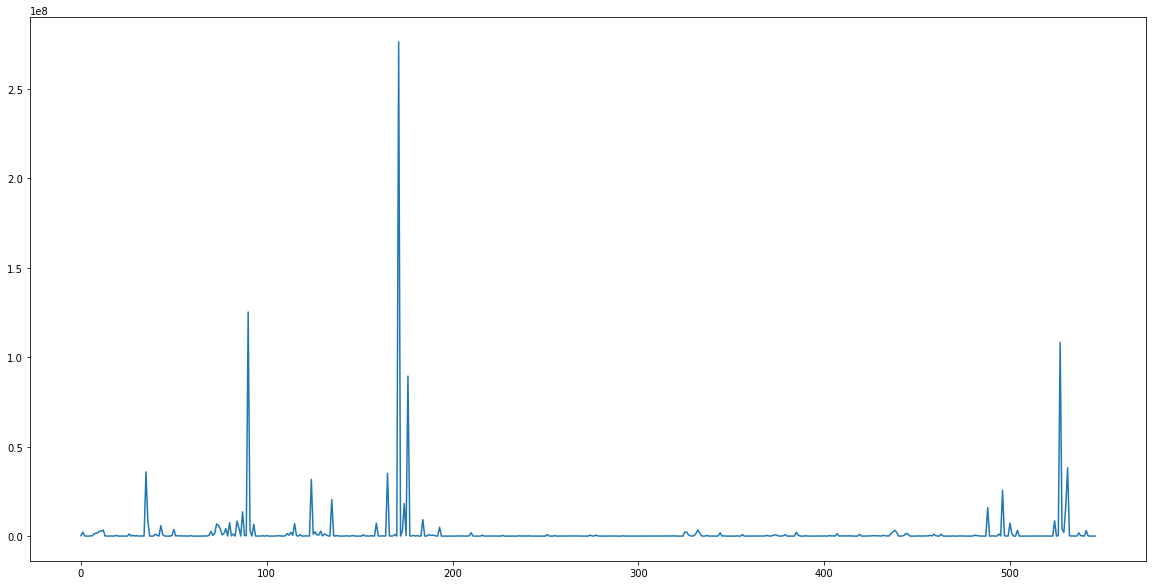

In [36]:
plt.plot(df["TotalEarnings"],label='Total Earnings Generated')

In [37]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['TotalTournaments','TotalEarnings'])
for i in range(0,len(data)):
    data["TotalTournaments"][i]=df['TotalTournaments'][i]
    data["TotalEarnings"][i]=df["TotalEarnings"][i]
data.head()

,TotalTournaments,TotalEarnings
0,99,191182
1,1085,2.19391e+06
2,117,93299.6
3,11,5773
4,16,5283.56


In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.TotalTournaments
data.drop("TotalTournaments",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [39]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [41]:
lstm_model.compile(loss="mean_squared_error",optimizer="adam")
x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 6s - loss: 0.0098 - 6s/epoch - 42ms/step


In [42]:
predicted_Total_Earnings=lstm_model.predict(X_test)
predicted_Total_Earnings=scaler.inverse_transform(predicted_Total_Earnings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


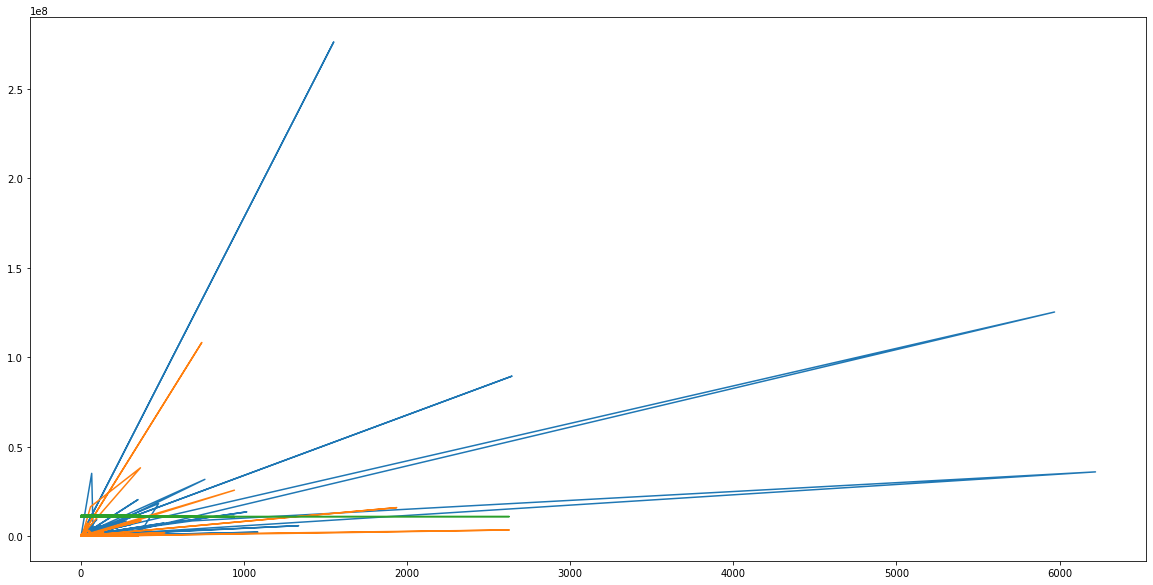

In [43]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_Total_Earnings
plt.plot(train_data["TotalEarnings"])
plt.plot(valid_data[['TotalEarnings',"Predictions"]])